In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [181]:
df =pd.read_csv('synthetic_housing_10k.csv')

In [182]:
df.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,11270,1985,1395,723,3,5,9,867750
1,19795,1982,1720,1391,3,4,8,1361493
2,4860,1996,557,339,3,5,9,377562
3,9390,1962,1947,261,3,2,6,747396
4,17418,1989,1992,542,2,4,7,1158238


In [183]:
df.tail()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
9995,12368,2009,954,910,3,3,5,897992
9996,4138,1966,701,460,2,2,6,354176
9997,4193,1981,1975,285,1,2,5,505803
9998,7257,1956,1710,1028,2,3,5,680819
9999,19577,2020,1353,128,1,2,5,1137221


In [184]:
df.shape

(10000, 8)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       10000 non-null  int64
 1   YearBuilt     10000 non-null  int64
 2   1stFlrSF      10000 non-null  int64
 3   2ndFlrSF      10000 non-null  int64
 4   FullBath      10000 non-null  int64
 5   BedroomAbvGr  10000 non-null  int64
 6   TotRmsAbvGrd  10000 non-null  int64
 7   SalePrice     10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [186]:
df.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,11968.012300,1986.02240,1255.836300,747.387100,2.005700,3.508100,6.501400,8.472372e+05
std,4602.234251,21.06802,434.415498,430.074595,0.809032,1.119491,1.374186,2.383063e+05
min,4001.000000,1950.00000,500.000000,0.000000,1.000000,2.000000,4.000000,3.119120e+05
25%,7959.000000,1968.00000,880.000000,374.000000,1.000000,3.000000,6.000000,6.489580e+05
50%,11941.500000,1986.00000,1258.000000,744.000000,2.000000,4.000000,6.000000,8.474700e+05
75%,15922.250000,2004.00000,1631.000000,1116.000000,3.000000,5.000000,7.000000,1.045877e+06
max,19998.000000,2022.00000,1999.000000,1499.000000,3.000000,5.000000,9.000000,1.404739e+06


In [187]:
df.isnull().sum().sum()

0

In [188]:
df.duplicated().sum()

0

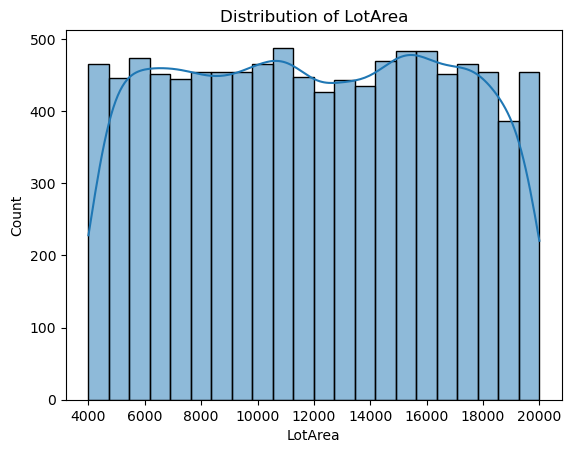

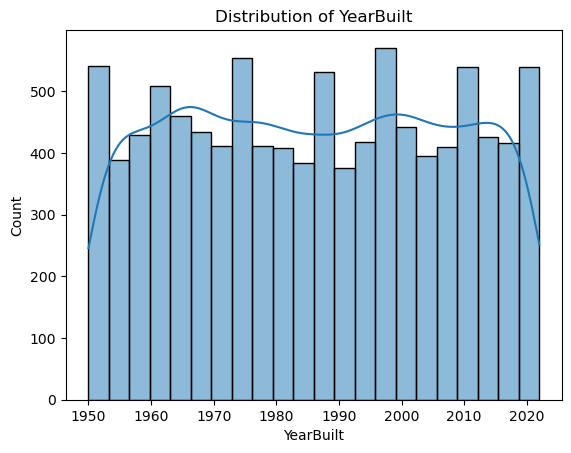

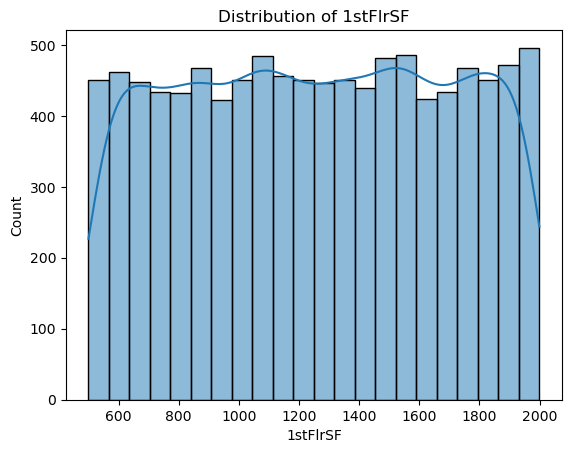

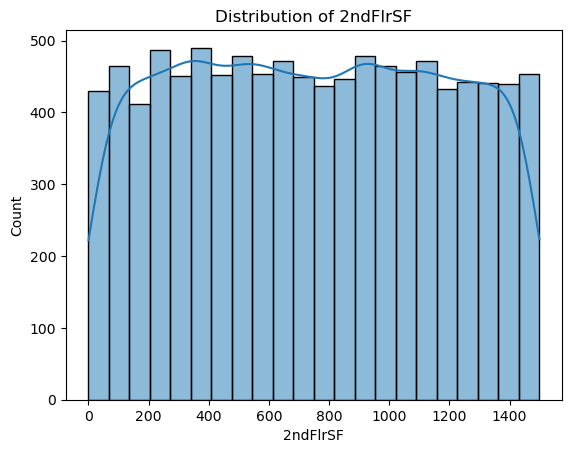

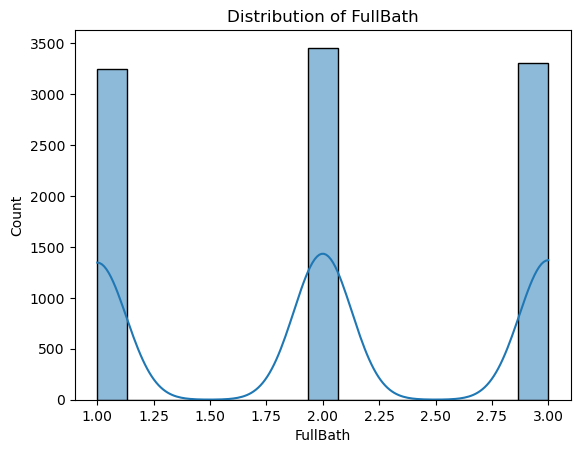

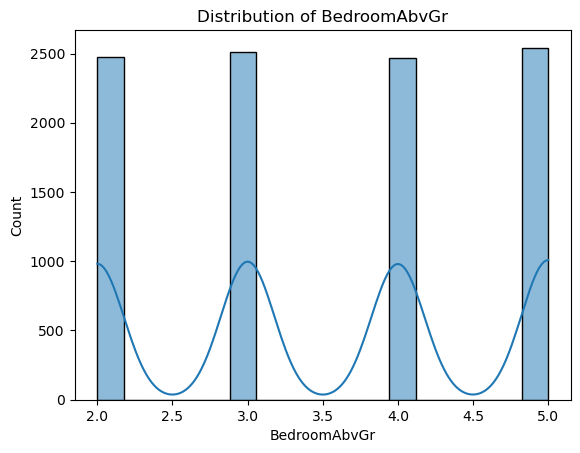

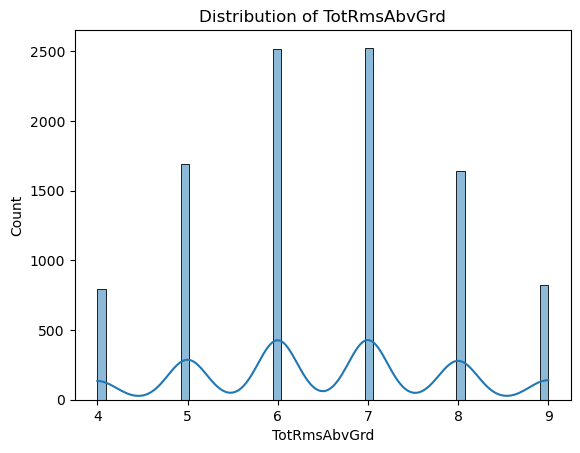

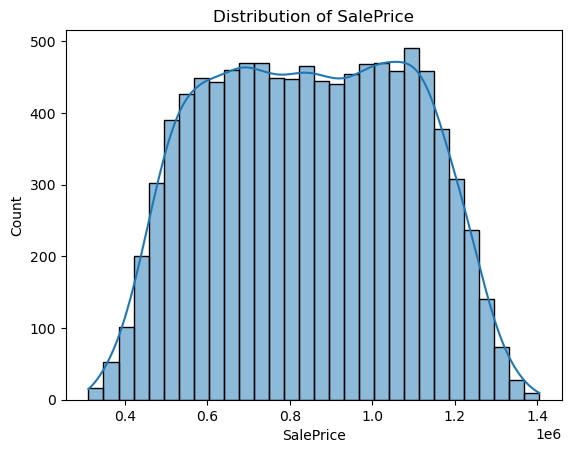

In [189]:
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

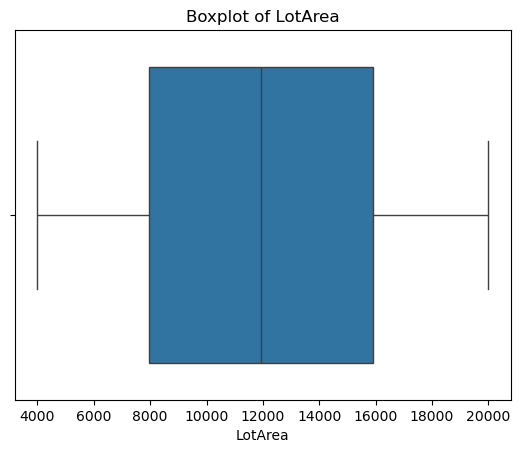

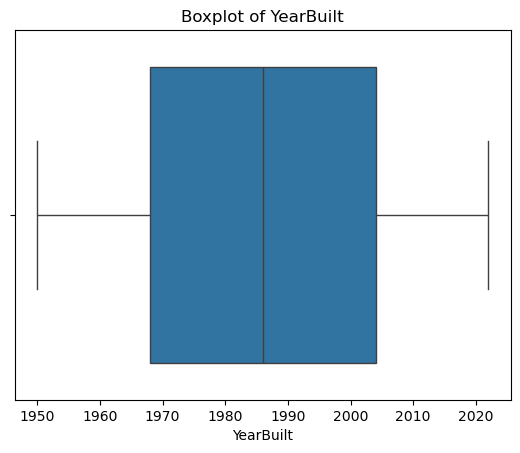

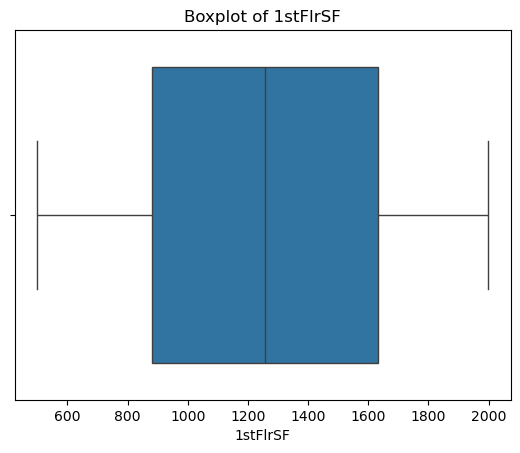

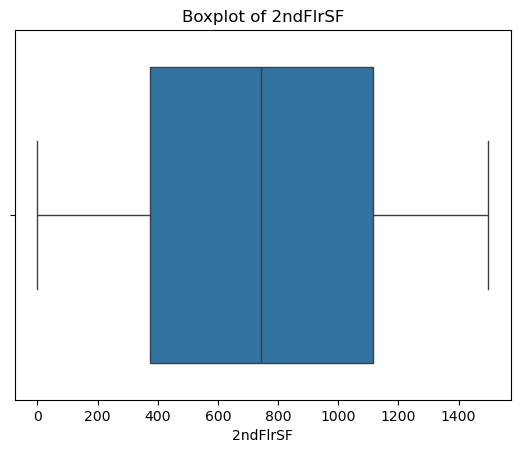

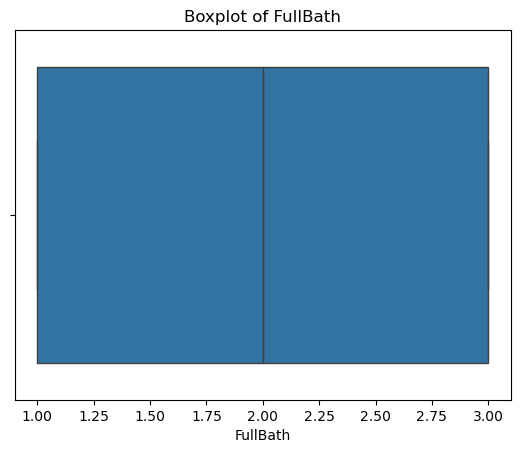

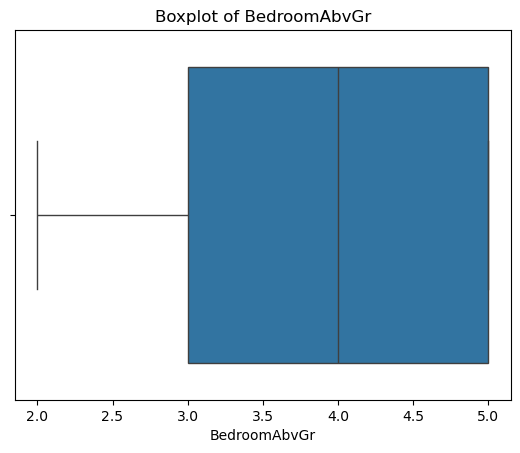

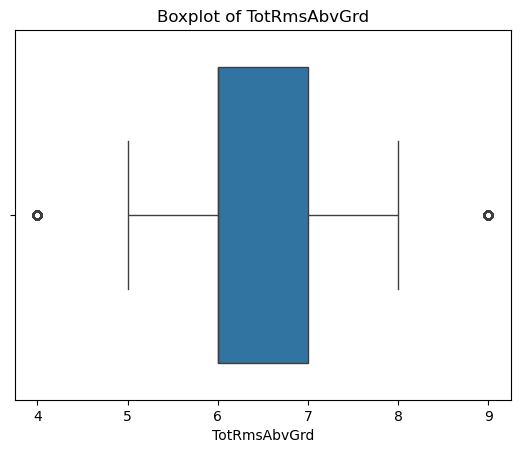

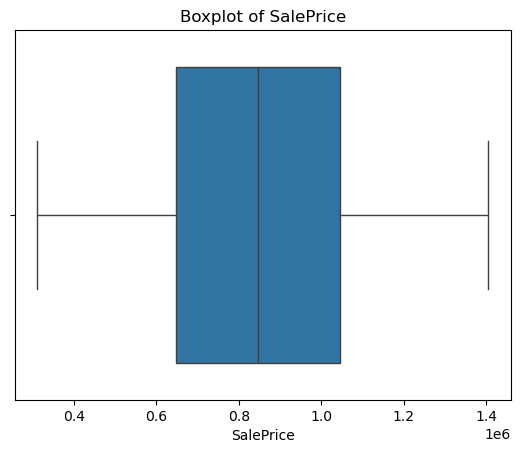

In [190]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [191]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[
            (df_clean[col] >= lower_bound) &
            (df_clean[col] <= upper_bound)
        ]
    
    return df_clean

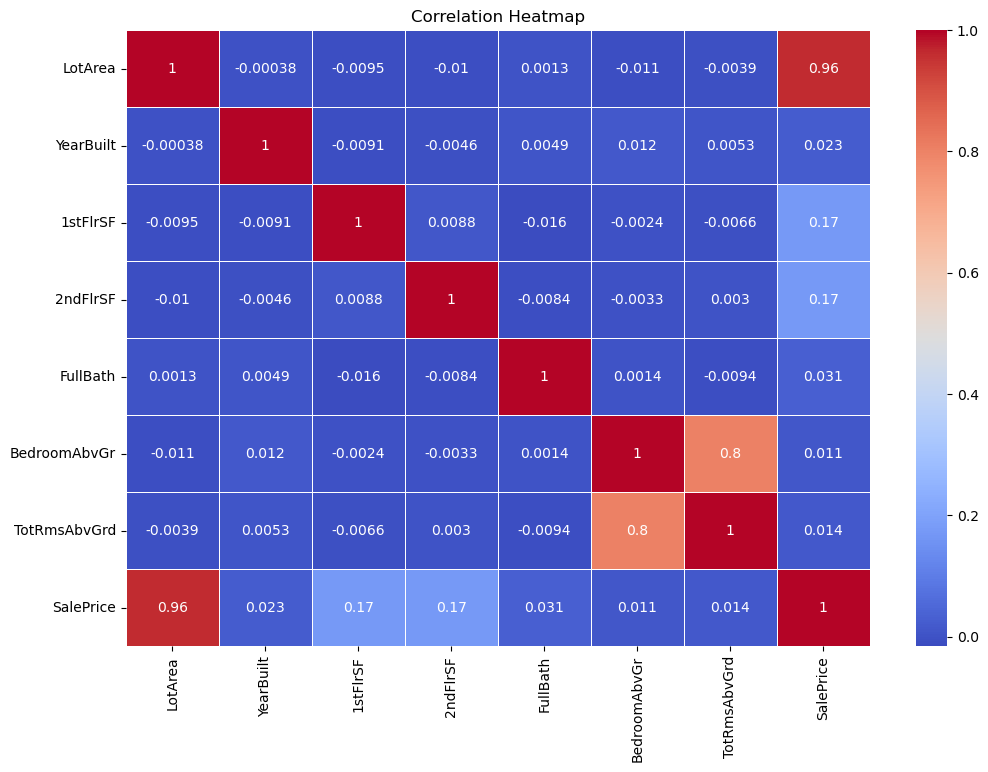

In [192]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [193]:
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [194]:
df["HouseAge"] = 2023 - df["YearBuilt"]

In [195]:
df["RoomsPerBedroom"] = df["TotRmsAbvGrd"] / df["BedroomAbvGr"]

In [196]:
df["PricePerSF"] = df["SalePrice"] / df["TotalSF"]

In [197]:
df["BathPerBedroom"] = df["FullBath"] / df["BedroomAbvGr"]

In [198]:
df = df.drop(["TotRmsAbvGrd", "1stFlrSF", "2ndFlrSF", "YearBuilt"], axis=1)

In [199]:
df["LotArea"] = np.log1p(df["LotArea"])

In [200]:
df.head()

,LotArea,FullBath,BedroomAbvGr,SalePrice,TotalSF,HouseAge,RoomsPerBedroom,PricePerSF,BathPerBedroom
0,9.329988,3,5,867750,2118,38,1.80,409.702550,0.60
1,9.893235,3,4,1361493,3111,41,2.00,437.638380,0.75
2,8.488999,3,5,377562,896,27,1.80,421.386161,0.60
3,9.147507,3,2,747396,2208,61,3.00,338.494565,1.50
4,9.765317,2,4,1158238,2534,34,1.75,457.078927,0.50


In [201]:
columns_to_check = ["LotArea", "TotalSF", "FullBath", "BedroomAbvGr", "SalePrice"]

print("Before Outlier Removal:", df.shape)
df = remove_outliers_iqr(df, columns_to_check)
print("After Outlier Removal:", df.shape)

Before Outlier Removal: (10000, 9)
After Outlier Removal: (10000, 9)


In [202]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [205]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

In [206]:
results_df = pd.DataFrame(results, columns=[
    "Model", "MAE", "MSE", "RMSE", "R2 Score"
])


In [207]:
print("\nModel Comparison:\n")
print(results_df.sort_values(by="R2 Score", ascending=False))


Model Comparison:

               Model           MAE           MSE          RMSE  R2 Score
2      Random Forest  12936.980055  3.006843e+08  17340.249452  0.994723
3  Gradient Boosting  16878.466178  4.485028e+08  21177.884101  0.992128
1      Decision Tree  18477.040500  5.990671e+08  24475.847386  0.989486
0  Linear Regression  39508.300586  2.299555e+09  47953.673649  0.959640
